<a href="https://colab.research.google.com/github/chanseongparkk/2022_Data_Analysis_Intern_practice/blob/main/07_20_%ED%9A%8C%EA%B7%80%EB%B6%84%EC%84%9D%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 패키지 임포트
import pandas as pd
import numpy as np
from scipy import stats
import math

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# os에 따른 font 깨짐 제거를 위해 font 지정

import os

if os.name == "nt":
    font_family = "Malgun Gothic"
else: #mac os
    font_family = "AppleGothic"
    
# - 값이 깨지는 문제 해결을 위해 파라미터값 설정

sns.set(font = font_family, rc = {"axes.unicode_minus" : False})

import warnings
warnings.filterwarnings("ignore")

###  데이터셋

* 종속변수: target(1년 뒤 측정한 당뇨병의 진행률)
* 독립변수: age(나이), sex(성별), bmi(bmi지수), bp(평균혈압), s1~s6(6종류의 혈액 검사 수치)

In [ ]:
### 데이터셋 로드

from sklearn.datasets import load_diabetes

data = load_diabetes()
df = pd.DataFrame(data.data, columns = data.feature_names)
df["target"] = data.target
display(df.head())

# 상관관계 확인

df.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,1.000000,0.173737,0.185085,0.335427,0.260061,0.219243,-0.075181,0.203841,0.270777,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241013,0.035277,0.142637,-0.379090,0.332115,0.149918,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395415,0.249777,0.261170,-0.366811,0.413807,0.446159,0.388680,0.586450
bp,0.335427,0.241013,0.395415,1.000000,0.242470,0.185558,-0.178761,0.257653,0.393478,0.390429,0.441484
s1,0.260061,0.035277,0.249777,0.242470,1.000000,0.896663,0.051519,0.542207,0.515501,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185558,0.896663,1.000000,-0.196455,0.659817,0.318353,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178761,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257653,0.542207,0.659817,-0.738493,1.000000,0.617857,0.417212,0.430453
s5,0.270777,0.149918,0.446159,0.393478,0.515501,0.318353,-0.398577,0.617857,1.000000,0.464670,0.565883
s6,0.301731,0.208133,0.388680,0.390429,0.325717,0.290600,-0.273697,0.417212,0.464670,1.000000,0.382483


### 1. 단순선형회귀분석


#### 1-1 데이터 탐색

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


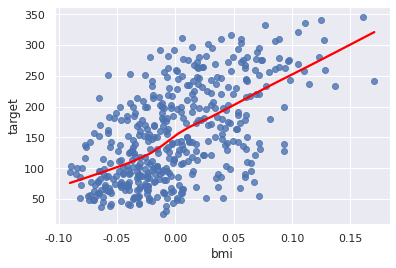

In [ ]:
# 산점도 확인

sns.regplot("bmi", "target", lowess = True, line_kws = {"color": "red"}, data = df)

Text(0.5, 1.0, 'rate')

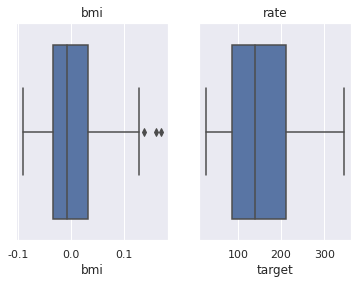

In [ ]:
### 이상값 확인

fig, (ax1, ax2) = plt.subplots(1, 2)

sns.boxplot("bmi", data = df, ax = ax1)
ax1.set_title("bmi")

sns.boxplot("target", data = df, ax = ax2)
ax2.set_title("rate")

Text(0.5, 1.0, 'rate')

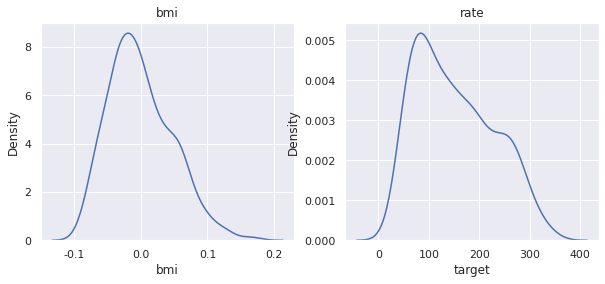

In [ ]:
### 분포 시각화

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,4))

sns.kdeplot(df.bmi, ax = ax1)
ax1.set_title("bmi")

sns.kdeplot(df.target, data = df, ax = ax2)
ax2.set_title("rate")

In [ ]:
# 왜도 확인

print(df.bmi.skew())
print(df.target.skew())

0.5981484879110462
0.44056293407014124


#### 1-2 단순선형회귀분석 - sklearn

In [ ]:
# dataset

x = df.bmi.values
y = df.target.values

x1 = x.reshape(-1,1)
y = y.reshape(-1,1)

print(x1.shape)
print(y.shape)

(442, 1)
(442, 1)


In [ ]:
# modeling

from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(x1,y)

LinearRegression()

In [ ]:
# 회귀계수 확인
print(lr_model.coef_[0])
print(lr_model.intercept_)

[949.43526038]
[152.13348416]


In [ ]:
# 회귀모델로 예측

lr_model.predict([[-2], [-1], [0], [1], [2]])

array([[-1746.73703661],
       [ -797.30177622],
       [  152.13348416],
       [ 1101.56874455],
       [ 2051.00400493]])

In [ ]:
# 잔차 계산
lr_pred = lr_model.predict(x1)
lr_res = y - lr_pred

In [ ]:
# 결정계수 계산
sse = (lr_res**2).sum()
sst = ((y - y.mean())**2).sum()
r_squared = 1 - (sse/sst)
print("R_squared : ", r_squared)

R_squared :  0.3439237602253803


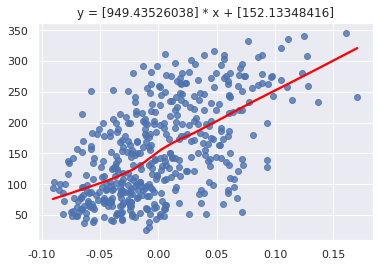

In [ ]:
# 시각화

sns.regplot(x1, y, lowess = True, line_kws = {"color" : "red"}, data = df)
plt.title("y = {} * x + {}".format(lr_model.coef_[0], lr_model.intercept_))
plt.show()

#### 1-3 단순선형회귀 통계적 분석

In [ ]:
from statsmodels.formula.api import ols

res_sr = ols("target~bmi", data = df).fit()

# 결과 확인
res_sr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.344
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     230.7
Date:                Wed, 20 Jul 2022   Prob (F-statistic):           3.47e-42
Time:                        01:37:08   Log-Likelihood:                -2454.0
No. Observations:                 442   AIC:                             4912.
Df Residuals:                     440   BIC:                             4920.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    152.1335      2.974     51.162      0.000     146.289     157.978
bmi          949.4353     62.515     15.187      0.000     826.570    1072.301
==============================================================================
Omnibus:                       11.674   Durbin-Watson:                   1.848
Prob(Omnibus):                  0.003   Jarque-Bera (JB):                7.310
Skew:                           0.156   Prob(JB):                       0.0259
Kurtosis:                       2.453   Cond. No.                         21.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### 1-4 회귀분석 결과

**첫번째 표**
* 독립변수(Df Model) : 1개
* 표본 수(No. Observations) : 442개
* 잔차의 자유도(Df Residuals) : 440
* 결정계수(R-squared) : 0.344
* 수정된 결정계수(Adj. R-squared) : 0.342
* f통계량(F-statistic) : 230.7
* prob(Prob (F-statistic)) : 3.47e-42(0.5 이하일수록 회귀계수는 0이 아니다) <- 유의미함

**두번째 표**
* coef(데이터로 얻은 회귀계수의 추정치) : 949.4353 * bmi + 152.1335
* std err(계수 추정치의 표준오차, 작을수록 좋음)
* t(t-test, 독립변수와 종속변수 간의 상관관계) 
* P>|t|(독립변수의 유의확률)

**결과 요약**
* 회귀모델은 통계적으로 유의하다(f통계량 230.7)
* 독립변수(bmi)는 유의하다(p_value : 0.000 < 0.05)


### 2. 다중선형회귀모델

#### 2-1 데이터 탐색

In [ ]:
print(df.shape)
df.head(3)

(442, 11)


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0


In [ ]:
df.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,1.000000,0.173737,0.185085,0.335427,0.260061,0.219243,-0.075181,0.203841,0.270777,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241013,0.035277,0.142637,-0.379090,0.332115,0.149918,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395415,0.249777,0.261170,-0.366811,0.413807,0.446159,0.388680,0.586450
bp,0.335427,0.241013,0.395415,1.000000,0.242470,0.185558,-0.178761,0.257653,0.393478,0.390429,0.441484
s1,0.260061,0.035277,0.249777,0.242470,1.000000,0.896663,0.051519,0.542207,0.515501,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185558,0.896663,1.000000,-0.196455,0.659817,0.318353,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178761,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257653,0.542207,0.659817,-0.738493,1.000000,0.617857,0.417212,0.430453
s5,0.270777,0.149918,0.446159,0.393478,0.515501,0.318353,-0.398577,0.617857,1.000000,0.464670,0.565883
s6,0.301731,0.208133,0.388680,0.390429,0.325717,0.290600,-0.273697,0.417212,0.464670,1.000000,0.382483


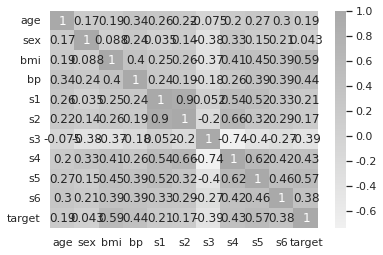

In [ ]:
cmap = sns.light_palette("darkgray",  as_cmap = True)
sns.heatmap(df.corr(), annot = True, cmap = cmap)
plt.show()

#### 2-2 다중선형회귀분석 - sklearn

In [ ]:
# dataset

train_x = df.copy()
train_x = train_x.drop("target", axis = 1)

train_y = df.target.values
train_y = train_y.reshape(-1,1)



In [ ]:
# modeling

dlr_model = LinearRegression()
dlr_model.fit(train_x, train_y)

print("절편 : ", dir_model.intercept_)
print("회귀계수 : ", dir_model.coef_)


절편 :  [152.13348416]
회귀계수 :  [[ -10.01219782 -239.81908937  519.83978679  324.39042769 -792.18416163
   476.74583782  101.04457032  177.06417623  751.27932109   67.62538639]]


In [ ]:
# 잔차
dlr_pred = dlr_model.predict(train_x)
dlr_res = y - dlr_pred

In [ ]:
# 결정계수 계산
sse = (dlr_res**2).sum()
sst = ((train_y - train_y.mean())**2).sum()
r_squared = 1 - (sse/sst)
print("R_squared : ", r_squared)

R_squared :  0.5177494254132934


In [ ]:
# 모델평가 MSE & RMSE

from sklearn.metrics import mean_squared_error
from math import sqrt

mse = mean_squared_error(train_y, dlr_pred)
print(mse)

rmse = np.sqrt(mse)
print(rmse)

print("score = ", dlr_model.score(train_x, train_y))
print("mse = ", mse)
print("rmse = ", rmse)

2859.6903987680657
53.47607314274362
score =  0.5177494254132934
mse =  2859.6903987680657
rmse =  53.47607314274362


#### 2-3 다중선형회귀분석 - 통계적 데이터 분석

In [ ]:
print(df.shape)
df.head(3)

(442, 11)


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0


In [ ]:
s_d_model = ols("target~age+sex+bmi+bp+s1+s2+s3+s4+s5+s6", df)
m_result = s_d_model.fit()
m_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     46.27
Date:                Wed, 20 Jul 2022   Prob (F-statistic):           3.83e-62
Time:                        02:02:17   Log-Likelihood:                -2386.0
No. Observations:                 442   AIC:                             4794.
Df Residuals:                     431   BIC:                             4839.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    152.1335      2.576     59.061      0.000     147.071     157.196
age          -10.0122     59.749     -0.168      0.867    -127.448     107.424
sex         -239.8191     61.222     -3.917      0.000    -360.151    -119.488
bmi          519.8398     66.534      7.813      0.000     389.069     650.610
bp           324.3904     65.422      4.958      0.000     195.805     452.976
s1          -792.1842    416.684     -1.901      0.058   -1611.169      26.801
s2           476.7458    339.035      1.406      0.160    -189.621    1143.113
s3           101.0446    212.533      0.475      0.635    -316.685     518.774
s4           177.0642    161.476      1.097      0.273    -140.313     494.442
s5           751.2793    171.902      4.370      0.000     413.409    1089.150
s6            67.6254     65.984      1.025      0.306     -62.065     197.316
==============================================================================
Omnibus:                        1.506   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.471   Jarque-Bera (JB):                1.404
Skew:                           0.017   Prob(JB):                        0.496
Kurtosis:                       2.726   Cond. No.                         227.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### 2-4 다중공선성 확인

In [ ]:
### VIF 계산 - 10 이상값 다중공선성 판단

from statsmodels.stats.outliers_influence import variance_inflation_factor

# 회귀모델 변수
print(s_d_model.exog_names)

# bmi의 VIF  
print(variance_inflation_factor(s_d_model.exog, 1))

# 독립변수 VIF
pd.DataFrame({"컬럼" : column,"VIF" : variance_inflation_factor(s_d_model.exog, i)}
                                                for i, column in enumerate(s_d_model.exog_names)
                                                if column != "Intercept") # 절편 제외

['Intercept', 'age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
1.2173065764321338


,컬럼,VIF
0,age,1.217307
1,sex,1.278073
2,bmi,1.509446
3,bp,1.459429
4,s1,59.203786
5,s2,39.194379
6,s3,15.402352
7,s4,8.890986
8,s5,10.076222
9,s6,1.484623


* 계수가 통계적으로 유의하지 않다면 대처 - 계수가 통계적으로 유의미하다면 VIF가 크더라도 특별히 대처할 필요 없음

* 변수들을 더하거나 빼서 새로운 변수를 만든다.

#### 2-5 잔차분석

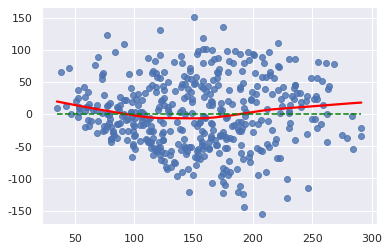

In [ ]:
## 선형성
s_d_res_fit = m_result.predict(df)
s_d_residuals = df.target - s_d_res_fit

# 선형성 시각화(red : 잔차)
sns.regplot(s_d_res_fit, s_d_residuals, lowess = True, line_kws = {"color" : "red"})
plt.plot([s_d_res_fit.min(), s_d_res_fit.max()],[0,0],"--",color = "green")

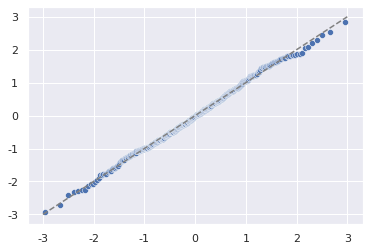

In [ ]:
## 정규성 확인
s_d_sr = stats.zscore(s_d_residuals)
(s_d_x, s_d_y),_ = stats.probplot(s_d_sr)

# 정규성 시각화
sns.scatterplot(s_d_x, s_d_y)
plt.plot([-3, 3], [-3, 3], "--", color = "gray")

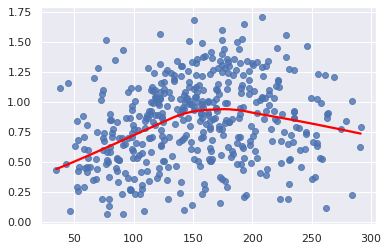

In [ ]:
## 잔차의 등분산성
sns.regplot(s_d_res_fit, np.sqrt(np.abs(s_d_sr)), lowess = True, line_kws = {"color" : "red"})

In [ ]:
from statsmodels.regression.linear_model import OLS
## 극단값 확인
from statsmodels.stats.outliers_influence import OLSInfluence
cd, _ = OLSInfluence(m_result).cooks_distance # cook 거리
cd.sort_values(ascending = False).head()

382    0.024475
123    0.021349
169    0.019560
304    0.018942
92     0.018134
dtype: float64